In [1]:
import numpy as np
def DMD(X,r,dt,mf):
    X1,X2 = X[:,:-1],X[:,1:] # Last column of X is current price of the day close to closing
    U,s,Vh = np.linalg.svd(X1,full_matrices=False)
    r = np.min(r,np.shape(U)[1])
    Ur,Sr,Vr = U[:,:r],np.diag(s[:r]),Vh[:r,:].T
    A_T = Ur.T@X2@Vr/Sr
    d,Wr = np.linalg.eig(A_T)
    Phi = X2@Vr/Sr@Wr
    Lambda = np.diag(d)
    Omega = np.log(Lambda)/dt
    b = X[:,-1:]@np.linalg.pinv(Phi)
    
    t = np.arange(0,(mf+1)*dt,dt)
    t = t.reshape((t.shape[0],1,1))
    time_dynamics = np.exp(t*Omega)*b
    X_DMD = Phi@time_dynamics.T.reshape((Phi.shape[0],t.shape[0]))
    return X_DMD[:,-1:]
    

hello


In [1]:
import numpy as np
import pandas as pd
import datetime 

In [3]:
t = np.arange(0,10,1)
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
(np.array([[3,0],[0,2]])@((t.reshape((np.shape(t)[0],1,1))*np.array([[1,1],[0,1]])) @np.array([[0,2]]).T)).T.reshape((2,10))

array([[ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36]])

In [3]:
a = pd.DataFrame()
a['Head'] = [1,2,3,4,5]
a

,Head
0,1
1,2
2,3
3,4
4,5


In [4]:
#a.index = ['a','b','c','d','e']
a.index = [datetime.datetime.today() - datetime.timedelta(days=x) for x in range(5)]
a

,Head
2022-09-02 19:29:55.730982,1
2022-09-01 19:29:55.730982,2
2022-08-31 19:29:55.730982,3
2022-08-30 19:29:55.730982,4
2022-08-29 19:29:55.730982,5


In [7]:
a['Head'][1] = 0
date = [datetime.datetime.today()- datetime.timedelta(days=x) for x in range(5)]

In [8]:
a['Date'] = date

In [9]:
a['Date'][2] = pd.NaT

d:\Programming\Python\fin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
a.iloc[-1] = [22,pd.NaT]
a

,Head,Date
2022-09-02 19:29:55.730982,1,2022-09-02 19:32:19.584442
2022-09-01 19:29:55.730982,0,2022-09-01 19:32:19.584442
2022-08-31 19:29:55.730982,3,NaT
2022-08-30 19:29:55.730982,4,2022-08-30 19:32:19.584442
2022-08-29 19:29:55.730982,22,NaT


In [2]:
b = pd.DataFrame(columns=['BuyDate','BuyPrice','SellDate','SellPrice'])
b

,BuyDate,BuyPrice,SellDate,SellPrice


In [3]:
b.loc[len(b.index)] = [1,2,3,4]
b

,BuyDate,BuyPrice,SellDate,SellPrice
0,1,2,3,4


In [6]:
b.loc[len(b.index)] = [1,2,3,4]
b

,BuyDate,BuyPrice,SellDate,SellPrice
0,1,2,3,4
1,1,2,3,4


In [9]:
b.iloc[len(b.index)-1][1:3] = [22,33]
print(b.iloc[len(b.index)-1][1:3])

BuyPrice    22
SellDate    33
Name: 1, dtype: object


In [9]:
import numpy as np
q = np.array([[1,2,3,4,11,22,4,5]]).T
b = np.zeros(q.shape)
np.argwhere(q>4)

array([[4, 0],
       [5, 0],
       [7, 0]], dtype=int64)

In [7]:
b

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [4]:
float('24.3')

24.3

In [3]:
a = pd.read_csv('./sector_data/Automotive.csv',index_col=0)

In [5]:
list(a.nlargest(10,'MktCap')['Ticker'])

['MARUTI.NS',
 'M&M.NS',
 'TATAMOTORS.NS',
 'BAJAJ-AUTO.NS',
 'EICHERMOT.NS',
 'HEROMOTOCO.NS',
 'MOTHERSON.NS',
 'BOSCHLTD.NS',
 'TVSMOTOR.NS',
 'ASHOKLEY.NS']

In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import html
import pandas as pd

In [30]:
URL = 'https://niftyinvest.com/option-chain/NIFTY'
source = requests.get(URL)

In [45]:
tree = html.fromstring(source.content)
ltp_call,strike,ltp_put = 3,5,7
table = tree.xpath('//*[@id="option-chain-table"]/tbody/tr')#[72]/td')

In [47]:
print(table[71].xpath('.//td')[3].text_content()) #text_content())

96.80


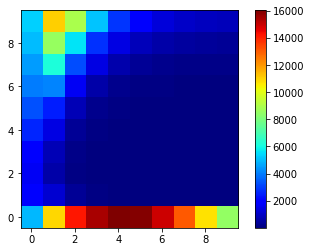

In [11]:
x = [1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 5500.0]

y = [50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0]

z = [[4881.8642105816871, 10911.715059458633, 14155.013920191856, 15445.716752715813, 16013.555045427016, 15930.210275343226, 14914.871694262614, 13066.110673589264, 10759.038539701312, 8463.0016244336093], [1974.871155086661, 1145.8564488717275, 360.21552184520687, 93.26083185814899, 21.427562046024793, 7.0515082675648033, 8.9490523628452756, 14.879083651382828, 21.096831336382142, 26.546911264223507], [1634.3004731594849, 596.47348127936391, 112.49120675840454, 15.812850921622774, 4.0543288410416025, 9.0618094371920641, 16.389066614461047, 22.915048528916472, 28.13970763744614, 32.19301414581065], [1986.732401772239, 799.55302793978888, 160.97797226074397, 24.950029150759416, 2.9740612607771544, 5.1831654930427353, 11.868454452741116, 18.423909277895582, 23.871268732800026, 28.176932672588872], [2601.7028764095298, 1395.8441541583775, 350.7791306410262, 76.264494509924447, 12.917045956205232, 2.0917899539090037, 4.7536763606740866, 10.386333025075864, 15.994635925645284, 20.802037330766186], [3293.2621749740892, 2468.8337536368813, 794.89657520857122, 231.80120180328421, 69.115519256908826, 22.56546362231742, 11.68385698697284, 12.181871134288121, 16.036344120838468, 20.480043889445149], [3946.9123317902149, 4077.9829695428052, 1678.9233197571568, 607.05248741635501, 240.16635849955915, 112.17393601200131, 66.792078445172521, 51.930124965393659, 48.76103688333918, 50.00623950373992], [4502.107788994359, 6161.1060688041271, 3218.1802555799272, 1379.0348763810446, 640.22321406877404, 349.14793361033742, 228.99173439562361, 178.00469532465459, 156.84445929086453, 148.55111237018477], [4948.2311747056465, 8553.3089397606091, 5603.5794468290587, 2781.2587849125666, 1439.9934016139214, 853.84661084199092, 589.64424718785426, 466.19185775513267, 405.81332964558175, 375.96900504309684], [5292.3370996081712, 11038.242790006936, 8921.6574107649831, 5087.0863086276313, 2867.5539374519794, 1796.784239152586, 1281.1061782196334, 1023.8418898637763, 890.53738452759285, 817.7523115877392]]

import numpy as np
import matplotlib.pyplot as p
p.imshow(z,interpolation='none',cmap=p.cm.jet,origin='lower')  
# many other colormaps can be seen here: http://matplotlib.org/examples/color/colormaps_reference.html
p.colorbar();

In [2]:
a = pd.DataFrame()
a['A'] = [1,2,3,4]
a['B'] = [11,12,13,14]
a

,A,B
0,1,11
1,2,12
2,3,13
3,4,14


In [25]:
a['A'][-1:] = np.nan
a['A'][-1:].isnull().values.any()

True